<a href="https://colab.research.google.com/github/williambrunos/Deep-Learning-Neuro-evolution/blob/main/GA_Implementation/GA_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Implementations with tensorflow

**NOTE:**

At the end of the notebook, there's a class that you can implement and get use of the genetic algorithm (GA)

## Abstract

This notebook tries to implement some neural netowork used to solve some problem and tries to evolve the weights of it using neural evolution, implemented with [tensorflow](https://www.tensorflow.org/probability/api_docs/python/tfp/optimizer/differential_evolution_minimize)

````Python
tfp.optimizer.differential_evolution_minimize(
    objective_function,
    initial_population=None,
    initial_position=None,
    population_size=50,
    population_stddev=1.0,
    max_iterations=100,
    func_tolerance=0,
    position_tolerance=1e-08,
    differential_weight=0.5,
    crossover_prob=0.9,
    seed=None,
    name=None
)
````

**obs**: if you read the documentation of this function, you'll see that the evolutionary algorithm will try to minimize the objective function, rather than maximize it. Because of this, it's important to implement a objective function with the negative value of the mathmatical expression.

"A candidate s_1 is considered better than s_2 if f(s_1) < f(s_2)." - The function documentation

We can use as a base example:

````Python
population_size = 40
  # With an initial population and a multi-part state.
  initial_population = (tf.random.normal([population_size]),
                        tf.random.normal([population_size]))
  def easom_fn(x, y):
    return -(tf.math.cos(x) * tf.math.cos(y) *
             tf.math.exp(-(x-np.pi)**2 - (y-np.pi)**2))

  optim_results = tfp.optimizer.differential_evolution_minimize(
      easom_fn,
      initial_population=initial_population,
      seed=43210)

  print(optim_results.converged)
  print(optim_results.position)  # Should be (close to) [pi, pi].
  print(optim_results.objective_value)    # Should be -1.


  # With a single starting point
  initial_position = (tf.constant(1.0), tf.constant(1.0))

  optim_results = tfp.optimizer.differential_evolution_minimize(
      easom_fn,
      initial_position=initial_position,
      population_size=40,
      population_stddev=2.0,
      seed=43210)
````

## Importações Necessárias

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Função de teste de tempo da evolução

In [2]:
def check_time_spent_by_evolutionary_algorithm(population_size,
                                               objective_function: object,
                                               max_iterations: int,
                                               variate_population_size: bool,
                                               seed=0):
  """
  This function must check the time spent by the evolutionary algorithm
  to upgrade the weights of a neural network according to some parameters
  given by the function.

  ----------------------
  PARAMS
  ---------------------

  - population_size: the number of weights of the neural network. Can be
  either a integer number or a list if the user want to variate the
  values of 'population_size' parameter to be tested.

  """

  list_of_times = []

  if ((variate_population_size == True) and (type(population_size) is list)):
    for size in population_size:
      initial_population = (tf.random.normal([size]))

      st = time.time()

      optim_results = tfp.optimizer.differential_evolution_minimize(
          objective_function=objective_function,
          initial_population=initial_population,
          max_iterations=max_iterations,
          seed=seed
      )
      
      et = time.time()
      time_taken = et - st
      list_of_times.append(time_taken)
  else:
    raise ValueError('If variate_population_size is True, then population_size must be a list of possible values')

  return list_of_times

### Implementando a função de teste

In [3]:
obj_func = lambda x: -(tf.math.sin(x) + tf.math.cos(x))

population_size_list = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

time_spent = check_time_spent_by_evolutionary_algorithm(population_size=population_size_list,
                                                        objective_function=obj_func, 
                                                        max_iterations=50,
                                                        variate_population_size=True,
                                                        seed=0)

### Visualizando os resultados

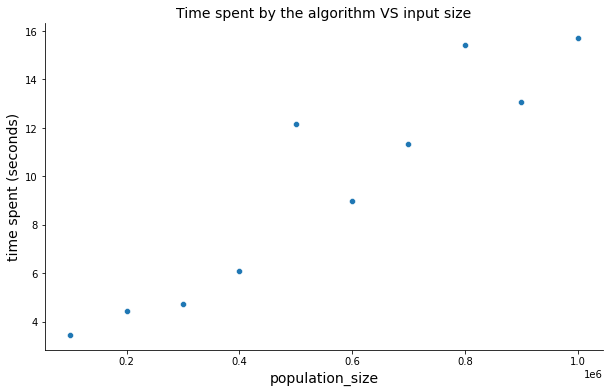

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.set_title('Time spent by the algorithm VS input size', fontsize=14)

ax.set_xlabel('population_size', fontsize=14)

ax.set_ylabel('time spent (seconds)', fontsize=14)
# ax.plot(population_size_list, time_spent)
sns.scatterplot(x=population_size_list, y=time_spent, ax=ax)

sns.despine()
plt.show()

##  Implementando uma rede neural

### Instanciando uma sequência de layers usando `tf.keras.Sequential`

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu', name='first_layer', input_shape=(16, )),
    tf.keras.layers.Dense(8, activation='tanh', name='second_layer'),
    tf.keras.layers.Dense(3, name='last_layer')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 3)                 51        
                                                                 
 second_layer (Dense)        (None, 8)                 32        
                                                                 
 last_layer (Dense)          (None, 3)                 27        
                                                                 
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.weights

[<tf.Variable 'first_layer/kernel:0' shape=(16, 3) dtype=float32, numpy=
 array([[-0.46818256,  0.38059044,  0.48482543],
        [ 0.17822498,  0.00900328, -0.53398347],
        [-0.14719999, -0.47189233, -0.12081403],
        [-0.21391222, -0.30877692,  0.02310157],
        [-0.00765401,  0.05650836, -0.1778852 ],
        [ 0.5328272 , -0.1374113 ,  0.04446185],
        [-0.13377145, -0.16145864,  0.20374447],
        [-0.08752596,  0.32108927,  0.49153775],
        [ 0.07826543,  0.09187239,  0.16314906],
        [-0.32133147, -0.5477413 , -0.45519042],
        [ 0.41632038, -0.09456539, -0.472874  ],
        [ 0.29794186, -0.5613152 ,  0.2054522 ],
        [ 0.52452284,  0.22918093, -0.10197058],
        [ 0.3550334 , -0.40001494, -0.18387115],
        [ 0.21963435, -0.1423195 ,  0.43512362],
        [ 0.0810352 , -0.21327513, -0.00111967]], dtype=float32)>,
 <tf.Variable 'first_layer/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'second

### Buildando o modelo utilizando um input

In [8]:
input = tf.random.normal((1, 16))
output = model(input)
print(output)
print(model.weights)

tf.Tensor([[-0.07607202 -0.16457114 -0.0319441 ]], shape=(1, 3), dtype=float32)
[<tf.Variable 'first_layer/kernel:0' shape=(16, 3) dtype=float32, numpy=
array([[-0.46818256,  0.38059044,  0.48482543],
       [ 0.17822498,  0.00900328, -0.53398347],
       [-0.14719999, -0.47189233, -0.12081403],
       [-0.21391222, -0.30877692,  0.02310157],
       [-0.00765401,  0.05650836, -0.1778852 ],
       [ 0.5328272 , -0.1374113 ,  0.04446185],
       [-0.13377145, -0.16145864,  0.20374447],
       [-0.08752596,  0.32108927,  0.49153775],
       [ 0.07826543,  0.09187239,  0.16314906],
       [-0.32133147, -0.5477413 , -0.45519042],
       [ 0.41632038, -0.09456539, -0.472874  ],
       [ 0.29794186, -0.5613152 ,  0.2054522 ],
       [ 0.52452284,  0.22918093, -0.10197058],
       [ 0.3550334 , -0.40001494, -0.18387115],
       [ 0.21963435, -0.1423195 ,  0.43512362],
       [ 0.0810352 , -0.21327513, -0.00111967]], dtype=float32)>, <tf.Variable 'first_layer/bias:0' shape=(3,) dtype=float32, n

### Iterando por todas as camadas do modelo

In [9]:
for layer in model.layers:
  print(layer.name, layer)

first_layer <keras.layers.core.dense.Dense object at 0x7ff8506e0810>
second_layer <keras.layers.core.dense.Dense object at 0x7ff7e0280a10>
last_layer <keras.layers.core.dense.Dense object at 0x7ff8506e0790>


### Obtendo pesos, viéses e inicializadores de viéses

In [10]:
# first layer
print('====FIRST LAYER====\n\n')
print(model.layers[0].weights)
print(model.layers[0].bias.numpy())
print(model.layers[0].bias_initializer)

# second layer
print('\n\n====SECOND LAYER====\n\n')
print(model.layers[1].weights)
print(model.layers[1].bias.numpy())
print(model.layers[1].bias_initializer)

# third layer
print('\n\n====THIRD LAYER====\n\n')
print(model.layers[2].weights)
print(model.layers[2].bias.numpy())
print(model.layers[2].bias_initializer)

====FIRST LAYER====


[<tf.Variable 'first_layer/kernel:0' shape=(16, 3) dtype=float32, numpy=
array([[-0.46818256,  0.38059044,  0.48482543],
       [ 0.17822498,  0.00900328, -0.53398347],
       [-0.14719999, -0.47189233, -0.12081403],
       [-0.21391222, -0.30877692,  0.02310157],
       [-0.00765401,  0.05650836, -0.1778852 ],
       [ 0.5328272 , -0.1374113 ,  0.04446185],
       [-0.13377145, -0.16145864,  0.20374447],
       [-0.08752596,  0.32108927,  0.49153775],
       [ 0.07826543,  0.09187239,  0.16314906],
       [-0.32133147, -0.5477413 , -0.45519042],
       [ 0.41632038, -0.09456539, -0.472874  ],
       [ 0.29794186, -0.5613152 ,  0.2054522 ],
       [ 0.52452284,  0.22918093, -0.10197058],
       [ 0.3550334 , -0.40001494, -0.18387115],
       [ 0.21963435, -0.1423195 ,  0.43512362],
       [ 0.0810352 , -0.21327513, -0.00111967]], dtype=float32)>, <tf.Variable 'first_layer/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]
[0. 0. 0.]


===

### Obtendo os mesmos dados utilizando nomes das camadas

In [11]:
# firstlayer by name
print('====FIRST LAYER====\n\n')
print((model.get_layer("first_layer").weights))

# secondlayer by name
print('\n\n====SECOND LAYER====\n\n')
print((model.get_layer("second_layer").weights))

# lastlayer by name
print('\n\n====THIRD LAYER====\n\n')
print((model.get_layer("last_layer").weights))

====FIRST LAYER====


[<tf.Variable 'first_layer/kernel:0' shape=(16, 3) dtype=float32, numpy=
array([[-0.46818256,  0.38059044,  0.48482543],
       [ 0.17822498,  0.00900328, -0.53398347],
       [-0.14719999, -0.47189233, -0.12081403],
       [-0.21391222, -0.30877692,  0.02310157],
       [-0.00765401,  0.05650836, -0.1778852 ],
       [ 0.5328272 , -0.1374113 ,  0.04446185],
       [-0.13377145, -0.16145864,  0.20374447],
       [-0.08752596,  0.32108927,  0.49153775],
       [ 0.07826543,  0.09187239,  0.16314906],
       [-0.32133147, -0.5477413 , -0.45519042],
       [ 0.41632038, -0.09456539, -0.472874  ],
       [ 0.29794186, -0.5613152 ,  0.2054522 ],
       [ 0.52452284,  0.22918093, -0.10197058],
       [ 0.3550334 , -0.40001494, -0.18387115],
       [ 0.21963435, -0.1423195 ,  0.43512362],
       [ 0.0810352 , -0.21327513, -0.00111967]], dtype=float32)>, <tf.Variable 'first_layer/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


====SECOND LAY

In [12]:
model.set_weights?

## Escopo da Pesquisa

### Funções de Ativação

#### Sigmoid:

![Sigmoid funciton](https://miro.medium.com/max/875/1*hYXbd20tIReMJ3T5D4OZLg.png)

A função sigmoid está presente apenas por razões históricas. Ela é não linear, mas muito computacionalmente custosa, causa desaparecimento do gradiente e não é centrada em zero.

É melhor usada em problemas de classificação binária na última camada da rede.

#### Softmax:

![Softmax function](https://lh6.googleusercontent.com/3vcfJ5hJhsMZAMFIbQOEycfVW1t6rh1CXt62DeMk8RPPXVzV4vCcURNm_z_F7618uAeSHT7qT7wE_UiK5Ic0b-Eeuunn6iTGeHWbpAaUAP6-G2ePubeGWCb4_TmSapeaimZqvuUs)

A função softmax ainda é melhor que a sigmoid, mas é melhor utilizada em problemas de classificação multi-classe.

#### Tanh:

![tanh graphic](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png)

A função tanh resolve um dos problemas das funções anteriores, a de ser centrada em zero.

#### ReLU: ReLU (Rectified Linear Unit) is defined as f(x) = max(0,x):

![ReLU](https://miro.medium.com/max/788/1*nLGwhQGJRDOnQvluaX-WiQ.png)

"This is a widely used activation function, especially with Convolutional Neural networks. It is easy to compute and does not saturate and does not cause the Vanishing Gradient Problem. It has just one issue of not being zero centred. It suffers from “dying ReLU” problem. Since the output is zero for all negative inputs. It causes some nodes to completely die and not learn anything.

Another problem with ReLU is of exploding the activations since it higher limit is, well, inf. This sometimes leads to unusable nodes." - Mediun article at [Activation functions](https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253)

#### Leaky ReLU and Parametric ReLU: It is defined as f(x) = max(αx, x)

![Leak ReLU](https://miro.medium.com/max/850/1*scA-bQ597yTXJ-417RETAQ.png)

"Here α is a hyperparameter generally set to 0.01. Clearly, Leaky ReLU solves the “dying ReLU” problem to some extent. Note that, if we set α as 1 then Leaky ReLU will become a linear function f(x) = x and will be of no use. Hence, the value of α is never set close to 1. If we set α as a hyperparameter for each neuron separately, we get parametric ReLU or PReLU." - Mediun article at [Activation functions](https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253)

![Activation Functions Cheat Sheet](https://static.wixstatic.com/media/8f929f_c90ad7e1f4c54b27b309e58ee2b9c654~mv2.png/v1/fit/w_880%2Ch_685%2Cal_c/file.png)

## GA class

In [79]:
class GeneticAlgorithm:
  def __init__(self, 
               objective_function, 
               initial_population, 
               max_iterations=100, 
               seed="123"):
    self.objective_function = objective_function
    self.initial_population = initial_population
    self.max_iterations = max_iterations
    self.seed = seed
    self.optim_results = None

  def train_ga(self):
    """
    This function applies the GA trainning with tensorflow
    """
    self.optim_results = tfp.optimizer.differential_evolution_minimize(
          objective_function=self.objective_function,
          initial_population=self.initial_population,
          max_iterations=self.max_iterations,
          seed=self.seed
      )

  def get_converged_result(self):
    """
    This function returns a boolean tensor depending if the GA had converged
    """
    return self.optim_results.converged

  def get_position_result(self):
    """
    This function returns the position of the individuals that had made
    the fitness function to minimize during the GA trainning
    """
    return self.optim_results.position
  
  def get_objective_value(self):
    """
    This function returns the objective value (ideal) of the fitness function
    """
    return self.optim_results.objective_value
  
  def get_final_population(self):
    """
    This function returns the final population of the individuals at the end
    of the GA trainning
    """
    return self.optim_results.final_population 
  
  def get_final_objective_value(self):
    """
    For each of the individuals of the population at the end of the GA execution,
    returns the fitness values for each one of them
    """
    return self.optim_results.final_objective_values

  def check_time_spent_by_evolutionary_algorithm(self, population_size: list,
                                                 variate_population_size: bool):
    """
    This function must check the time spent by the evolutionary algorithm
    to upgrade the weights of a neural network according to some parameters
    given by the function.

    ----------------------
    PARAMS
    ---------------------

    - population_size: the number of weights of the neural network. Can be
    either a integer number or a list if the user want to variate the
    values of 'population_size' parameter to be tested.

    """

    list_of_times = []

    if ((variate_population_size == True) and (type(population_size) is list)):
      for size in population_size:
        initial_population = (tf.random.normal([size]))

        st = time.time()

        optim_results = self.train_ga()
        
        et = time.time()
        time_taken = et - st
        list_of_times.append(time_taken)
    else:
      raise ValueError('If variate_population_size is True, then population_size must be a list of possible values')

    return list_of_times

In [80]:
a = tf.random.normal([40])
def easom_fn(x):
  return -tf.math.sin(x)
GA = GeneticAlgorithm(easom_fn, a)

In [81]:
GA.train_ga()

In [82]:
ps = [10000, 200000, 30000]
GA.check_time_spent_by_evolutionary_algorithm(population_size=ps, variate_population_size=True)

[0.3662710189819336, 0.24460959434509277, 0.25389695167541504]

## Sandbox

Aqui vai qualquer coisa rs

In [13]:
population_size = 40
# With an initial population and a multi-part state.
initial_population = (tf.random.normal([population_size]))

print(f'initial pop: {initial_population}') 

def easom_fn(x):
  return -tf.math.sin(x)

st = time.time()

optim_results = tfp.optimizer.differential_evolution_minimize(
    easom_fn,
    initial_population=initial_population,
    max_iterations=50,
    seed=43210)

et = time.time()

time_spent = et - st 
print(f'time spent {time_spent}')

print(optim_results.converged)
print(optim_results.position)  # Should be (close to) [pi, pi].
print(optim_results.objective_value)    # Should be -1.
print(optim_results.final_population) # final population
print(optim_results.objective_value) # final value of objective fun. on the final position
print(optim_results.final_objective_values)

# With a single starting point
initial_position = (tf.constant(1.0))

optim_results = tfp.optimizer.differential_evolution_minimize(
                easom_fn,
                initial_position=initial_position,
                population_size=40,
                population_stddev=2.0,
                seed=43210)

initial pop: [ 0.29626808 -0.16818215 -0.14377171  0.40346417  0.8295372   0.76418614
 -1.095355   -0.61698276  1.4405764  -0.12567267 -0.35234573  0.8779033
  0.2109137   2.9259536   0.18782878  1.0781256   0.63683623  0.76843876
  0.57737035  0.93675977 -0.14560866 -1.5355195  -1.2934884   0.9142121
 -0.1001076  -0.03636413  2.253069    1.239689   -0.24057911 -0.63542855
 -1.3394338  -0.20371307  0.19951399 -0.8881995  -0.575347    0.48768696
 -0.44177058  0.55211914 -1.4806004  -0.32296494]
time spent 0.19807147979736328
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(1.5707092, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32)
tf.Tensor(
[1.5707092 1.5710129 1.5708438 1.5708401 1.5707015 1.5707093 1.5710375
 1.570554  1.5709201 1.5709388 1.5708503 1.570835  1.5705534 1.5706358
 1.5710107 1.5707695 1.5709093 1.5706253 1.5708973 1.5708213 1.5708137
 1.5707448 1.5706604 1.5705712 1.5707579 1.5706326 1.5707074 1.5709352
 1.5708432 1.5706854 1.5707932 1.5706536 1.5706573

In [14]:
np.array(optim_results.position)

array(1.5706855, dtype=float32)

## Referências

[Hot to get weights of layers in tensforflow ](https://www.gcptutorials.com/post/how-to-get-weights-of-layers-in-tensorflow)

[tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

[Guia do tensorflow](https://www.tensorflow.org/guide/keras/sequential_model)

[Tutoriasi do tensorflow](https://www.tensorflow.org/tutorials)